In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
import imutils
from imutils.video import FileVideoStream
import time
from collections import deque
from imutils.video import FPS

In [4]:
cols = ['frame', 'frame index', 'forward', 'head position x', 'head position y', 'eye', 'gaze position x', 'gaze position y']
p1v1 = pd.read_csv('C:/Users/arshk/MLAI/Research Project/Baidu/Gaze_txt_files/p006/002._2017-09-28-20-00_ori_0.txt', sep=",", header = None, names = cols)

In [5]:
# Storing video
vs = cv2.VideoCapture('002.mp4')

In [26]:
# Counting Frames using inbuilt method
int(vs.get(cv2.CAP_PROP_FRAME_COUNT))

640

In [27]:
# Counting Frames Manually
def count_frames_manual(video):
    total = 0
    while True:
        (grabbed, frame) = video.read()

        if not grabbed:
            break
        total += 1
    return total

count_frames_manual(vs)

640

In [58]:
p1v1["gaze position y"].describe()

count    1479.000000
mean        0.475753
std         0.031289
min         0.385897
25%         0.460726
50%         0.478785
75%         0.490723
max         0.683399
Name: gaze position y, dtype: float64

In [6]:
import cv2
import imutils
vs = cv2.VideoCapture('002.mp4')
pts = deque(maxlen=64) #buffer size

count = 0
k=0
while True:
    ret,frame = vs.read()
    while(ret) and k <len(p1v1):
        frame = imutils.resize(frame, height=512, width = 1024)

        pos_x = p1v1.loc[k]["gaze position x"]*1024
        pos_y = (1 - p1v1.loc[k]["gaze position y"])*512
        k+=1
        
        cv2.circle(frame,(int(pos_x), int(pos_y)),10, (0,0,255), -1) 
        count += 1
        cv2.putText(frame, "Queue Size: {}".format(count),
            (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
        
        cv2.imshow("Frame", frame)

        key = cv2.waitKey(1) & 0xFF
        if key == ord("q"):
            break
        ret, frame = vs.read()
    break

cv2.destroyAllWindows()
vs.release()   

In [ ]:
fvs = FileVideoStream('179.mp4').start()
time.sleep(1.0)

fps = FPS().start()

while True:
    frame = fvs.read()
    count = 0
    while fvs.more():
        frame = imutils.resize(frame, width=450)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = np.dstack([frame, frame, frame])
        # display the size of the queue on the frame
        cv2.putText(frame, "Queue Size: {}".format(fvs.Q.qsize()),
            (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)	
        # show the frame and update the FPS counter
        cv2.imshow("Frame", frame)
        key = cv2.waitKey(1) & 0xFF
        if key == ord("q"):
            break
        fps.update()
        frame = fvs.read()
        count+=1
    break

fps.stop()
print("Frames: {:.2f}".format(count))

cv2.destroyAllWindows()
fvs.stop()

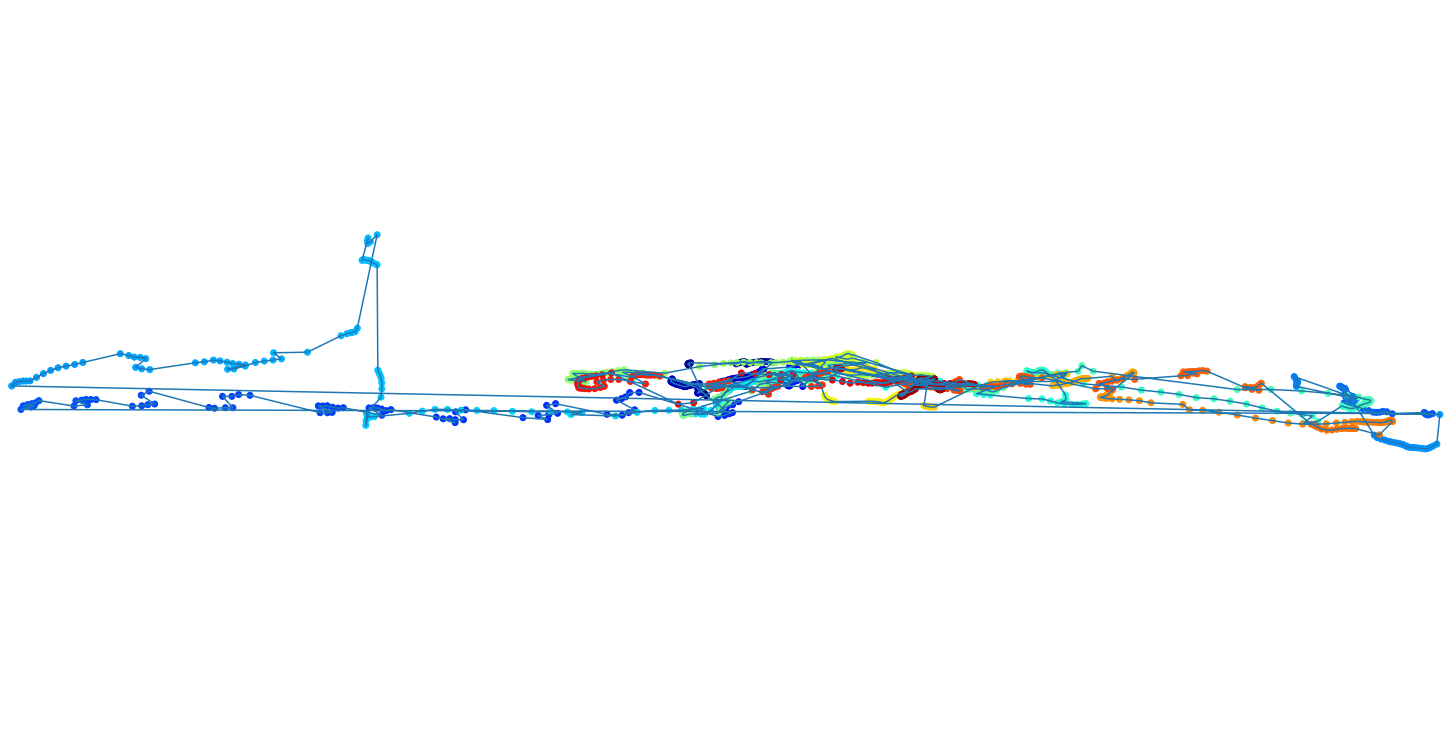

In [47]:
m = 0
n = 1437

fig = plt.figure(frameon=False)
fig.set_size_inches(20,10)

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.plot(p1v1[m:n]['gaze position x']*512, p1v1[m:n]['gaze position y']*1024)
plt.scatter(p1v1[m:n]['gaze position x']*512, p1v1[m:n]['gaze position y']*1024, marker = 'o', cmap = "jet", c = p1v1[m:n]["frame index"])
plt.xlim(0, 512)
plt.ylim(0, 1024)


# ax.imshow(fig, aspect='auto')

plt.savefig('graph.png')

In [65]:
background = cv2.imread('test_pic.jpg')
overlay = cv2.imread('graph.png')
overlay_2 = cv2.resize(overlay, (1024, 512))

added_image_2 = cv2.addWeighted(background,0.6,overlay_2,0.6,0)

cv2.imshow("Frame", added_image_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Rough

In [31]:
video = cv2.VideoCapture("050.mp4")
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
if int(major_ver)  < 3 :
    fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
    print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
else :
    fps = video.get(cv2.CAP_PROP_FPS)
    print ("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))
 
video.release()

Frames per second using video.get(cv2.CAP_PROP_FPS) : 59.94004383024997


In [32]:
cap = cv2.VideoCapture("050.mp4")
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)

1239


In [33]:
cols = ['frame', 'frame index', 'forward', 'head position x', 'head position y', 'eye', 'gaze position x', 'gaze position y']
p1v1 = pd.read_csv('C:/Users/arshk/MLAI/Research Project/Baidu/Gaze_txt_files/p003/050._2017-10-06-21-49_ori_0.txt', sep=",", header = None, names = cols)

In [34]:
p1v1

,frame,frame index,forward,head position x,head position y,eye,gaze position x,gaze position y
0,frame,1,forward,0.497237,0.545933,eye,0.506431,0.520867
1,frame,2,forward,0.496260,0.546452,eye,0.505455,0.521675
2,frame,3,forward,0.495851,0.546520,eye,0.504956,0.521702
3,frame,4,forward,0.495674,0.546600,eye,0.504718,0.521671
4,frame,5,forward,0.495281,0.546632,eye,0.504316,0.522265
...,...,...,...,...,...,...,...,...
1234,frame,1235,forward,0.684467,0.573391,eye,0.712976,0.514070
1235,frame,1236,forward,0.684925,0.572995,eye,0.711898,0.516949
1236,frame,1237,forward,0.685067,0.572795,eye,0.711719,0.516247
1237,frame,1238,forward,0.685192,0.572615,eye,0.711454,0.515580
